In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv(r"C:\Users\HP\Downloads\Amazon Sale Report.csv")
data.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,1,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,1,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128976 entries, 0 to 128975
Data columns (total 18 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128976 non-null  int64  
 1   Order ID            128976 non-null  object 
 2   Date                128976 non-null  object 
 3   Status              128976 non-null  object 
 4   Fulfilment          128976 non-null  object 
 5   Sales Channel       128976 non-null  object 
 6   ship-service-level  128976 non-null  object 
 7   Category            128976 non-null  object 
 8   Size                128976 non-null  object 
 9   Courier Status      128976 non-null  object 
 10  Qty                 128976 non-null  int64  
 11  currency            121176 non-null  object 
 12  Amount              121176 non-null  float64
 13  ship-city           128941 non-null  object 
 14  ship-state          128941 non-null  object 
 15  ship-postal-code    128941 non-nul

In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
index,128976.0,64486.130427,37232.897832,0.0,32242.75,64486.5,96730.25,128974.0
Qty,128976.0,0.904401,0.313368,0.0,1.00,1.0,1.00,15.0
Amount,121176.0,648.562176,281.185041,0.0,449.00,605.0,788.00,5584.0
ship-postal-code,128941.0,463945.677744,191458.488954,110001.0,382421.00,500033.0,600024.00,989898.0


In [6]:
data.shape

(128976, 18)

In [7]:
data.nunique().to_frame(name = "Count")

,Count
index,128808
Order ID,120229
Date,91
Status,13
Fulfilment,2
Sales Channel,2
ship-service-level,2
Category,9
Size,11
Courier Status,4


In [8]:
data.isnull().sum()

index                    0
Order ID                 0
Date                     0
Status                   0
Fulfilment               0
Sales Channel            0
ship-service-level       0
Category                 0
Size                     0
Courier Status           0
Qty                      0
currency              7800
Amount                7800
ship-city               35
ship-state              35
ship-postal-code        35
ship-country            35
B2B                      0
dtype: int64

<Axes: >

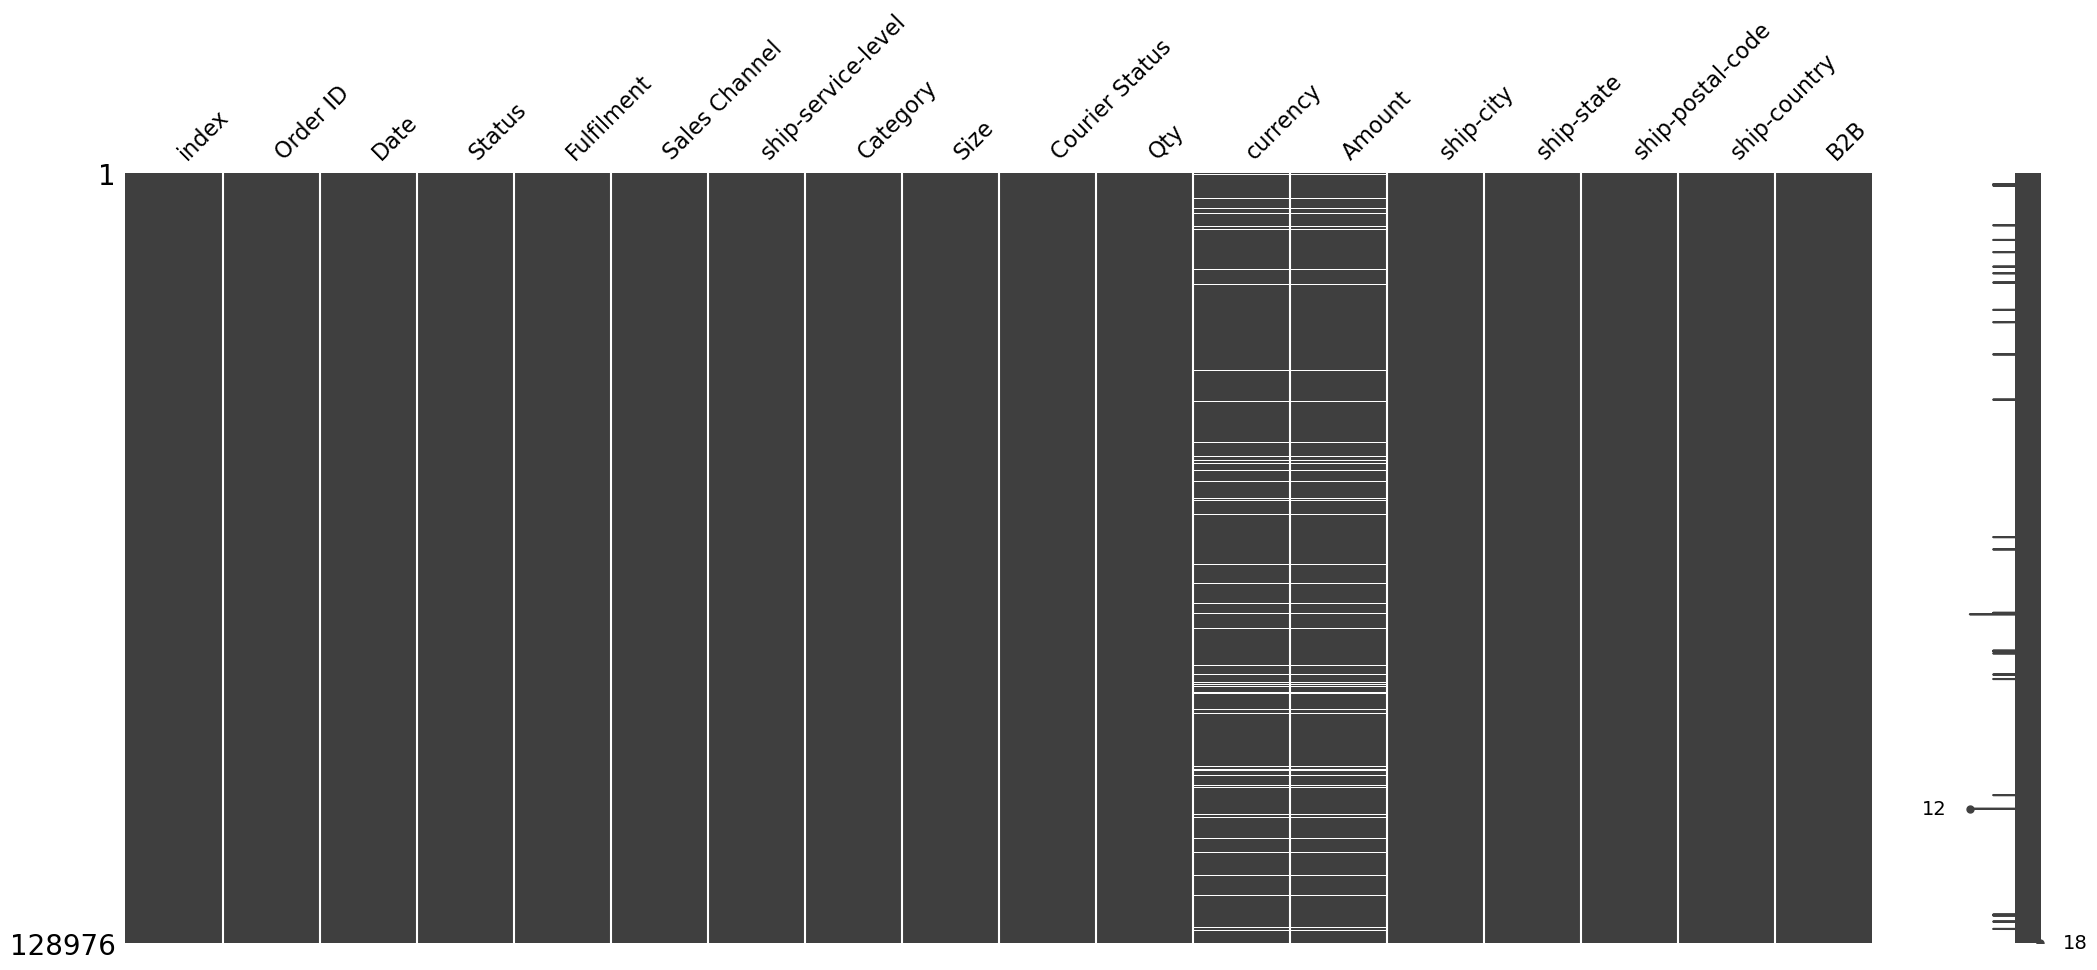

In [9]:
import missingno as msno
msno.matrix(data)

In [10]:
data['Date'] = pd.to_datetime(data["Date"])

In [11]:
data.drop(columns= ['index','Fulfilment', 'ship-country', 'currency'], inplace = True)

In [12]:
data[data.duplicated(['Order ID'],keep = False)]

,Order ID,Date,Status,Sales Channel,ship-service-level,Category,Size,Courier Status,Qty,Amount,ship-city,ship-state,ship-postal-code,B2B
6,408-5748499-6859555,2022-04-30,Shipped,Amazon.in,Expedited,T-shirt,L,Shipped,1,653.0,CHANDIGARH,CHANDIGARH,160036.0,False
7,406-7807733-3785945,2022-04-30,Shipped - Delivered to Buyer,Amazon.in,Standard,Shirt,S,Shipped,1,399.0,HYDERABAD,TELANGANA,500032.0,False
8,407-5443024-5233168,2022-04-30,Cancelled,Amazon.in,Expedited,T-shirt,3XL,Cancelled,0,NaN,HYDERABAD,TELANGANA,500008.0,False
9,402-4393761-0311520,2022-04-30,Shipped,Amazon.in,Expedited,Shirt,XXL,Shipped,1,363.0,Chennai,TAMIL NADU,600041.0,False
10,407-5633625-6970741,2022-04-30,Shipped,Amazon.in,Expedited,Shirt,S,Shipped,1,685.0,CHENNAI,TAMIL NADU,600073.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128931,407-8519205-5064368,2022-05-31,Shipped,Amazon.in,Expedited,T-shirt,XL,Shipped,1,635.0,VIJAYAWADA,ANDHRA PRADESH,520010.0,False
128942,403-3035549-4142738,2022-05-31,Shipped,Amazon.in,Expedited,Trousers,XXL,Shipped,1,529.0,BENGALURU,KARNATAKA,560102.0,False
128943,403-3035549-4142738,2022-05-31,Shipped,Amazon.in,Expedited,Trousers,XXL,Shipped,1,518.0,BENGALURU,KARNATAKA,560102.0,False
128953,404-8878574-4524358,2022-05-31,Shipped,Amazon.in,Expedited,Shirt,M,Shipped,1,301.0,Rishra Hooghly,WEST BENGAL,712249.0,False


In [13]:
len(data) - len(data.drop_duplicates(['Order ID']))

8747

In [14]:
data.drop_duplicates(['Order ID'],inplace = True,ignore_index=True)

In [15]:
# Filling Null values
data[data['Amount'].isnull()]['Status'].value_counts(normalize=True).apply(lambda x: format(x, '.2%'))

Status
Cancelled                       97.63%
Shipped                          2.18%
Shipping                         0.11%
Shipped - Delivered to Buyer     0.05%
Shipped - Returned to Seller     0.01%
Pending                          0.01%
Name: proportion, dtype: object

In [16]:
data['Amount'].fillna(0,inplace=True)
data['ship-city'].fillna('unknown', inplace = True)
data['ship-state'].fillna('unknown', inplace = True)
data['ship-postal-code'].fillna('unknown', inplace = True)

In [17]:
mapp = []

In [18]:
# Convert B2B colum value
data["B2B"].replace(to_replace=[True,False],value=["business","customr"],inplace = True)

In [19]:
data.head()

,Order ID,Date,Status,Sales Channel,ship-service-level,Category,Size,Courier Status,Qty,Amount,ship-city,ship-state,ship-postal-code,B2B
0,405-8078784-5731545,2022-04-30,Cancelled,Amazon.in,Standard,T-shirt,S,On the Way,0,647.62,MUMBAI,MAHARASHTRA,400081.0,customr
1,171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,Amazon.in,Standard,Shirt,3XL,Shipped,1,406.00,BENGALURU,KARNATAKA,560085.0,customr
2,404-0687676-7273146,2022-04-30,Shipped,Amazon.in,Expedited,Shirt,XL,Shipped,1,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,business
3,403-9615377-8133951,2022-04-30,Cancelled,Amazon.in,Standard,Blazzer,L,On the Way,0,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,customr
4,407-1069790-7240320,2022-04-30,Shipped,Amazon.in,Expedited,Trousers,3XL,Shipped,1,574.00,CHENNAI,TAMIL NADU,600073.0,customr


In [20]:
data["Date"] = pd.to_datetime(data["Date"])

In [21]:
march = data["Date"][data['Date'].dt.month == 3]
march.dt.day.nunique()

1

In [22]:
data= data[(data["Date"].dt.month != 3)]
data['month'] = data["Date"].dt.month
data["month"].unique()

array([4, 5, 6])

In [23]:
month_map = { 4:"april",5:"may",6:"June"}
data["month"] = data["Date"].dt.month.map(month_map)
month_order = ["april","may","june"]
data["month"] = pd.Categorical(data["month"],categories = month_order,ordered = True)
print("Minumum date:",data["Date"].min())
print("Maximum date:",data["Date"].max())
print(f'This dataset contains the months {data["month"].unique()} for 2022')

Minumum date: 2022-04-01 00:00:00
Maximum date: 2022-06-29 00:00:00
This dataset contains the months ['april', 'may', NaN]
Categories (3, object): ['april' < 'may' < 'june'] for 2022


## Data Visualization

#### Sales performance, trends, and patterns overview.

In [24]:
# # Define the desired order for the 'size' column
size_order = ['Free','XS', 'S', 'M', 'L', 'XL', 'XXL', '3XL', '4XL', '5XL', '6XL']

# Create an ordered categorical variable for the 'size' column
data['Size'] = pd.Categorical(data['Size'], categories=size_order, ordered=True)
data["Size"]

0           S
1         3XL
2          XL
3           L
4         3XL
         ... 
120224     XL
120225      M
120226    XXL
120227     XS
120228      S
Name: Size, Length: 120071, dtype: category
Categories (11, object): ['Free' < 'XS' < 'S' < 'M' ... '3XL' < '4XL' < '5XL' < '6XL']

# Average Montly order Amount

In [25]:
montly_sales = data.groupby(pd.Grouper(key = 'Date',freq ="M")).agg({'Amount':"sum"})
latest_rev = montly_sales.tail(1).iloc[0][0]
avg_revenue = montly_sales.tail(3).head(2).mean()[0]
pct_below_avg =round((1-(latest_rev/avg_revenue)) *100,1)

In [26]:
import matplotlib.ticker as ticker

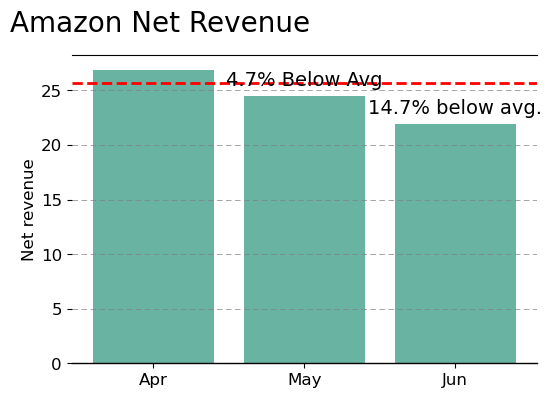

In [27]:
# plot graph
fig, ax = plt.subplots(figsize=(6,4))
bars = ax.bar(montly_sales.index.strftime('%b'),
              montly_sales['Amount'], 
              color='#69b3a2')

# May month Revenue calculate
for i,bar in enumerate(bars):
    if i== len(bars)-1 or i< len(bars) - 2:
        continue
    month_sales = montly_sales.iloc[i]["Amount"]
    pct_below_avg =round((1-(month_sales/avg_revenue)) *100,1)
    ax.annotate(f'{pct_below_avg}% Below Avg',
               xy = (bar.get_x() + bar.get_width()/2,
                     bar.get_height()-7000),
               xytext =(0,5),
                textcoords='offset points',
               ha ='center',va ='bottom',
                fontsize = 14)
    
# june month revenue calculate
latest_bar = bars[-1]
latest_sales = latest_bar.get_height()
pct_below_avg = round((1-(latest_sales/ avg_revenue))*100,1)
ax.annotate(f'{pct_below_avg}% below avg.', 
            xy=(latest_bar.get_x() + latest_bar.get_width()/2, latest_bar.get_height()-7000), 
            xytext=(0, 5),
            textcoords='offset points',
            ha='center', va='bottom', 
            fontsize=14)

# Label graph

ax.set_title('Amazon Net Revenue', fontsize=20,x=.19,y=1.05)
ax.set_yticklabels(list(range(0,41,5)))
ax.set_ylabel("Net revenue",fontsize=12,labelpad=3)
ax.yaxis.grid(linestyle='--', color='gray', linewidth=0.5, dashes=(8, 5))
ax.xaxis.grid(False)

plt.axhline(avg_revenue,
            linestyle='--', color='red',
            linewidth=2, 
            label='Q2 Average Revenue')

ax.tick_params(axis='both', labelsize=12)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_linewidth(1)
ax.spines['bottom'].set_color('black')
plt.show()

In [28]:
# Date by month and calculate the average order vlaue
monthly_aov = data.groupby(pd.Grouper(key='Date', freq= "M")).agg({'Amount':'sum','Order ID':'nunique'})
monthly_aov['Avg_order_value'] = monthly_aov['Amount']/monthly_aov["Order ID"]
monthly_aov['pct_change'] = monthly_aov['Avg_order_value'].pct_change() * 100

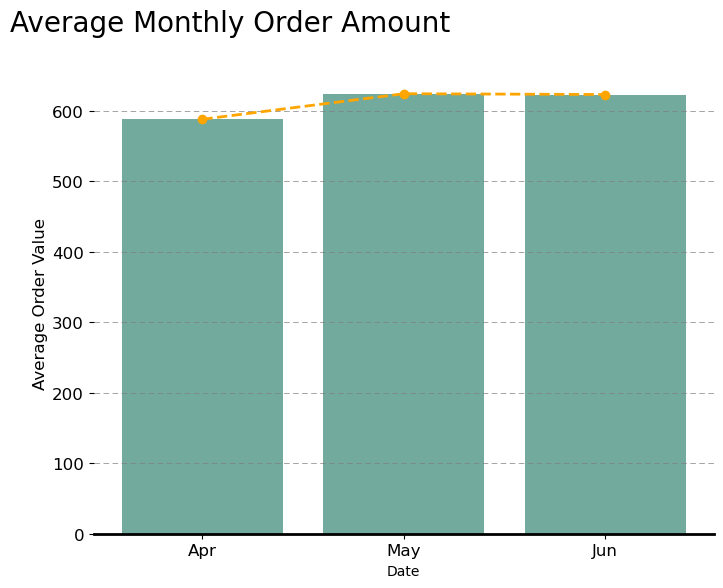

In [29]:
fig, ax = plt.subplots(figsize=(8,6))
sns.barplot(x=monthly_aov.index.strftime('%b'),
            y=monthly_aov['Avg_order_value'],
            ax=ax, color= '#69b3a2')

ax.plot(monthly_aov.index.strftime('%b'),
        monthly_aov['Avg_order_value'],
        linestyle='--', 
        linewidth=2,
        color='orange',
        marker='o')

apr_val = monthly_aov['Avg_order_value'][0]
jun_val = monthly_aov['Avg_order_value'][2]
pct_change = ((jun_val - apr_val) / apr_val) * 100


ax.set_title('Average Monthly Order Amount', fontsize=20, x=.22, y=1.07)
ax.set_ylabel('Average Order Value', fontsize=12, labelpad=3)

ax.yaxis.grid(linestyle='--', color='gray', linewidth=0.5, dashes=(8, 5))

ax.tick_params(axis='both', labelsize=12)
# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_linewidth(2)
ax.spines['bottom'].set_color('black')

plt.show()

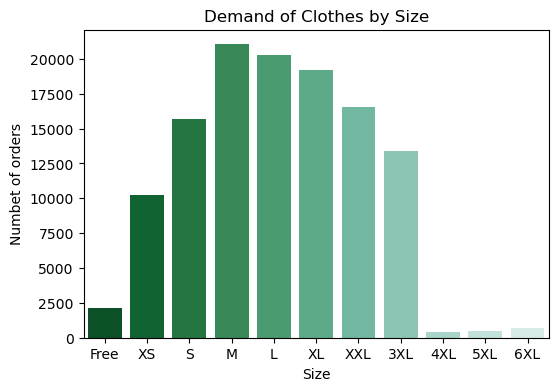

In [42]:

# Assuming 'data' is your DataFrame
s1 = data['Size'].value_counts()
palette = sns.color_palette("BuGn_r", len(a))
fig, ax = plt.subplots(figsize=(6,4))
sns.barplot(x = s1.index, y = s1.values, ax=ax,palette = palette)
ax.set_title('Demand of Clothes by Size')
ax.set_xlabel('Size')
ax.set_ylabel('Numbet of orders')
plt.show()


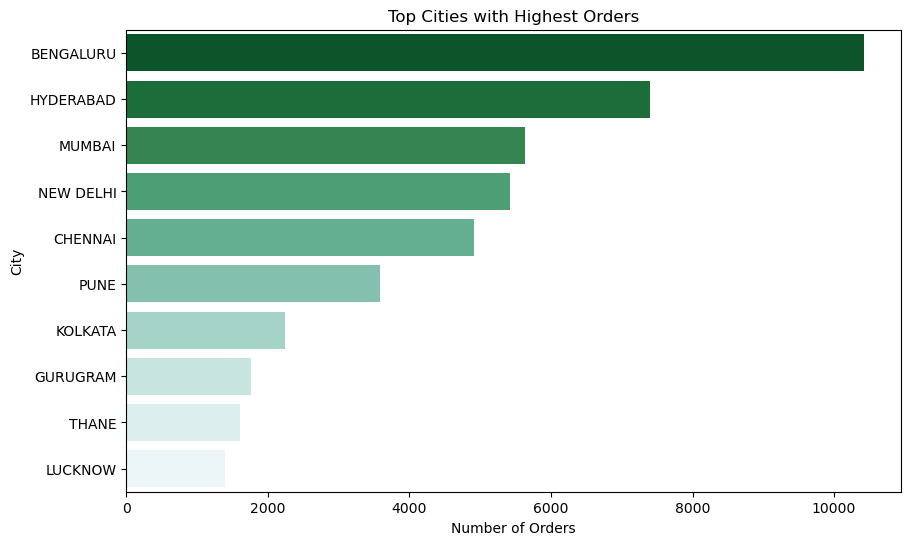

In [31]:

# Get the top 10 cities with the highest number of orders
a = data['ship-city'].value_counts().head(10)

# Define a distinct color palette
palette = sns.color_palette("BuGn_r", len(a))

fig, ax = plt.subplots(figsize=(10, 6))

# Create a bar plot with the specified color palette
sns.barplot(y = a.index, x = a.values, ax=ax, palette=palette)
ax.set_title('Top Cities with Highest Orders')
ax.set_xlabel('Number of Orders')
ax.set_ylabel('City')
plt.show()


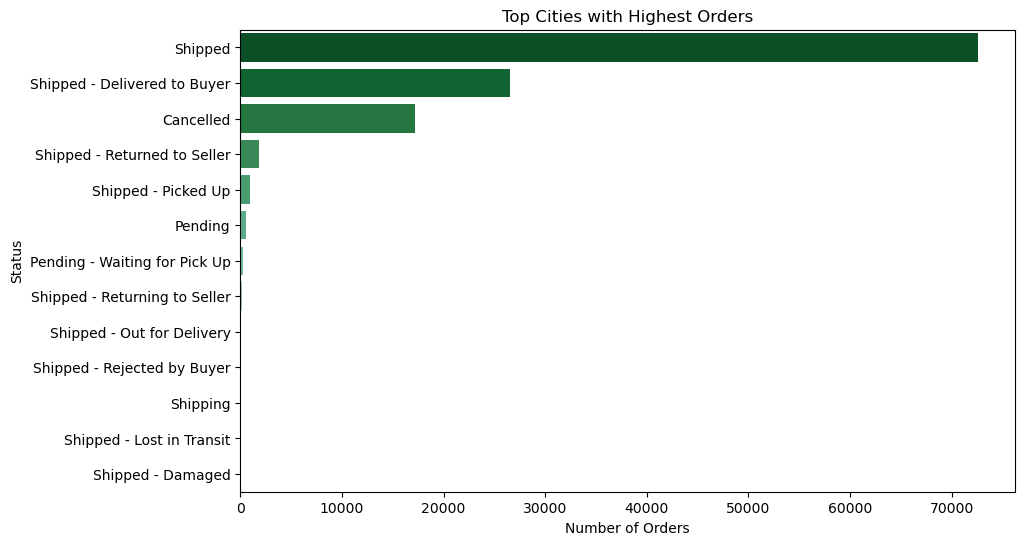

In [32]:

# Get the top 10 cities with the highest number of orders
a = data['Status'].value_counts()

# Define a distinct color palette
palette = sns.color_palette("BuGn_r", len(a))

fig, ax = plt.subplots(figsize=(10, 6))

# Create a bar plot with the specified color palette
sns.barplot(y = a.index, x = a.values, ax=ax, palette=palette)
ax.set_title('Top Cities with Highest Orders')
ax.set_xlabel('Number of Orders')
ax.set_ylabel('Status')
plt.show()


In [33]:
# product category ad calculate the total sales
sales_cate = data.groupby('Category')['Amount'].sum()
included_categories = ["Blazzer","T-shirt","Shirt",'Trousers',"Perfume","Socks",'Wallet',"Watch"]
sales_cate = sales_cate.loc[included_categories]
total_rev = sales_cate.sum()
pct = (sales_cate/total_rev) * 100
pct = pct.sort_values(ascending=False)

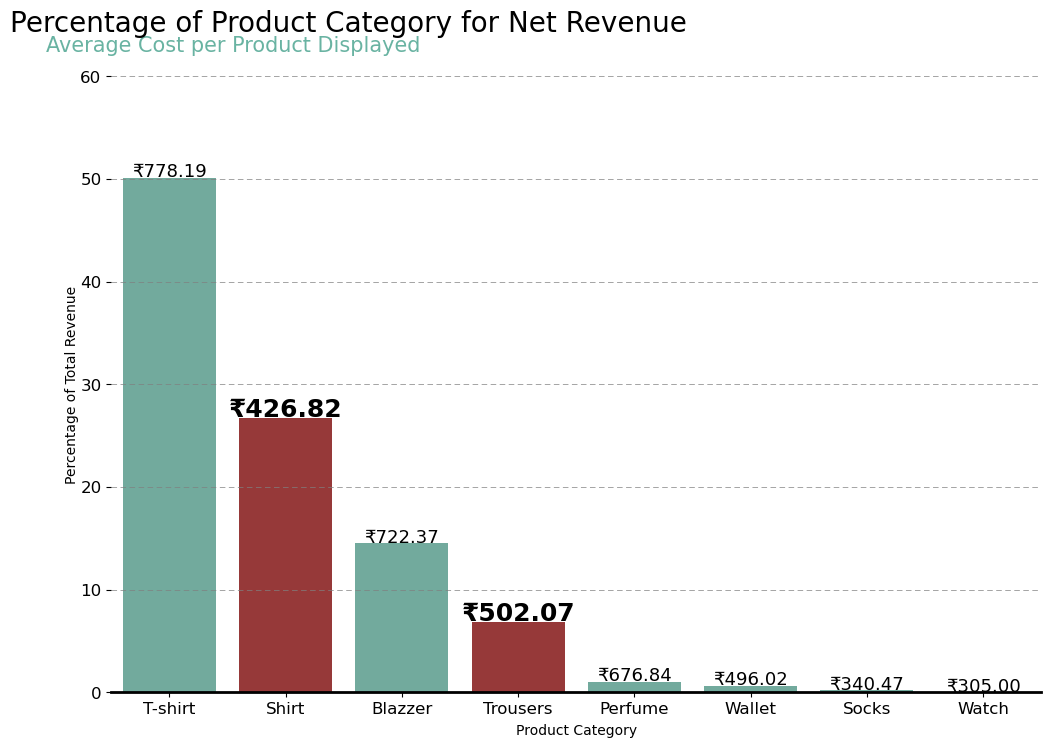

In [34]:
fig, ax = plt.subplots(figsize=(12,8))
palette_colors = ['brown' if cat in ['Trousers', 'Shirt'] else '#69b3a2' for cat in pct.index]
sns.barplot(x=pct.index, y=pct.values, ax=ax, palette=palette_colors)

num_y_ticks = 10
y_tick_values =list(range(0,101,10))
ax.set_yticks(y_tick_values)

ax.set_ylabel('Percentage of Total Revenue', labelpad=1)
ax.set_ylim(0, 60)
ax.set_xlabel('Product Category', labelpad=5)
ax.set_title('Percentage of Product Category for Net Revenue', fontsize=20, x=0.255, y=1.05, pad=10)
ax.text(-.07, 1.04, 'Average Cost per Product Displayed', fontsize=15, color='#69b3a2', transform=ax.transAxes)
ax.tick_params(axis='both', labelsize=12)

ax.yaxis.grid(linestyle='--', color='gray', linewidth=0.5, dashes=(8, 5))


for i, category in enumerate(pct.index):
    avg_cost = data[data['Category'] == category]['Amount'].mean()
    if category in ['Shirt','Trousers']:
        ax.text(i, pct.values[i] +.1, f'₹{avg_cost:.2f}', ha='center', fontsize=18, fontweight='bold')
    else:
        ax.text(i, pct.values[i] +.1, f'₹{avg_cost:.2f}', ha='center', fontsize=13)
western_sales = pct['Trousers']
western_index = pct.index.get_loc('Trousers')

# Define the callout box properties
bbox_props = dict(boxstyle='round', facecolor='white', edgecolor='black', alpha=1)
arrow_props = dict(facecolor='black', arrowstyle='wedge', alpha=0.5)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_linewidth(2)
ax.spines['bottom'].set_color('black')
plt.show()
fig.savefig('Percent_Prod_Revenuw.png', dpi=300)

In [57]:
# Auto EDA
import sweetviz as sv
data['ship-postal-code'] = data['ship-postal-code'].astype(str)

my_report = sv.analyze(data)

# Save the report as HTML file
my_report.show_html('Report.html')

                                             | | [  0%]   00:00 -> (? left)

Report Report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [58]:
import dtale

d = dtale.show(data)
d.open_browser()

